<a href="https://colab.research.google.com/github/Sai-Kale/AWS_LEARNING/blob/master/AWS_EKS/K8S_Crash_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kubernetes Crash Course:**


What is Kuberenetes?

- Open Source Container Orchestration Framework.
- It Manages Apps that are made up of 100-1000 of containers.

Problems that K8S solve ?

- Trend from monolith to Microservices.
- Increased usage of containers for Applications.
- Demand for proper way of managing those containers.

What Does Orchestration Tools offer?

- High Availability
- Scalability
- Disaster Recovery.


Basic Components of K8S: 

**Node**: In which basically  Pods run.
**Pods**: Smallest unit in K8S archtiecture. Inside which our cotainers run.
      Note - There is only one application that can run inside a Pod and we can have as many containers of that pod as required.

Different Pods are communicated using a IP internal to that particular Node.
Pods are Epheremal i.e. then can die easily.
For example if we run a DB pod when that pod dies and restarts it gets a new IP.
Which might cause issues while communicating to the DB from outside world.
This is reason we use Service in K8S.


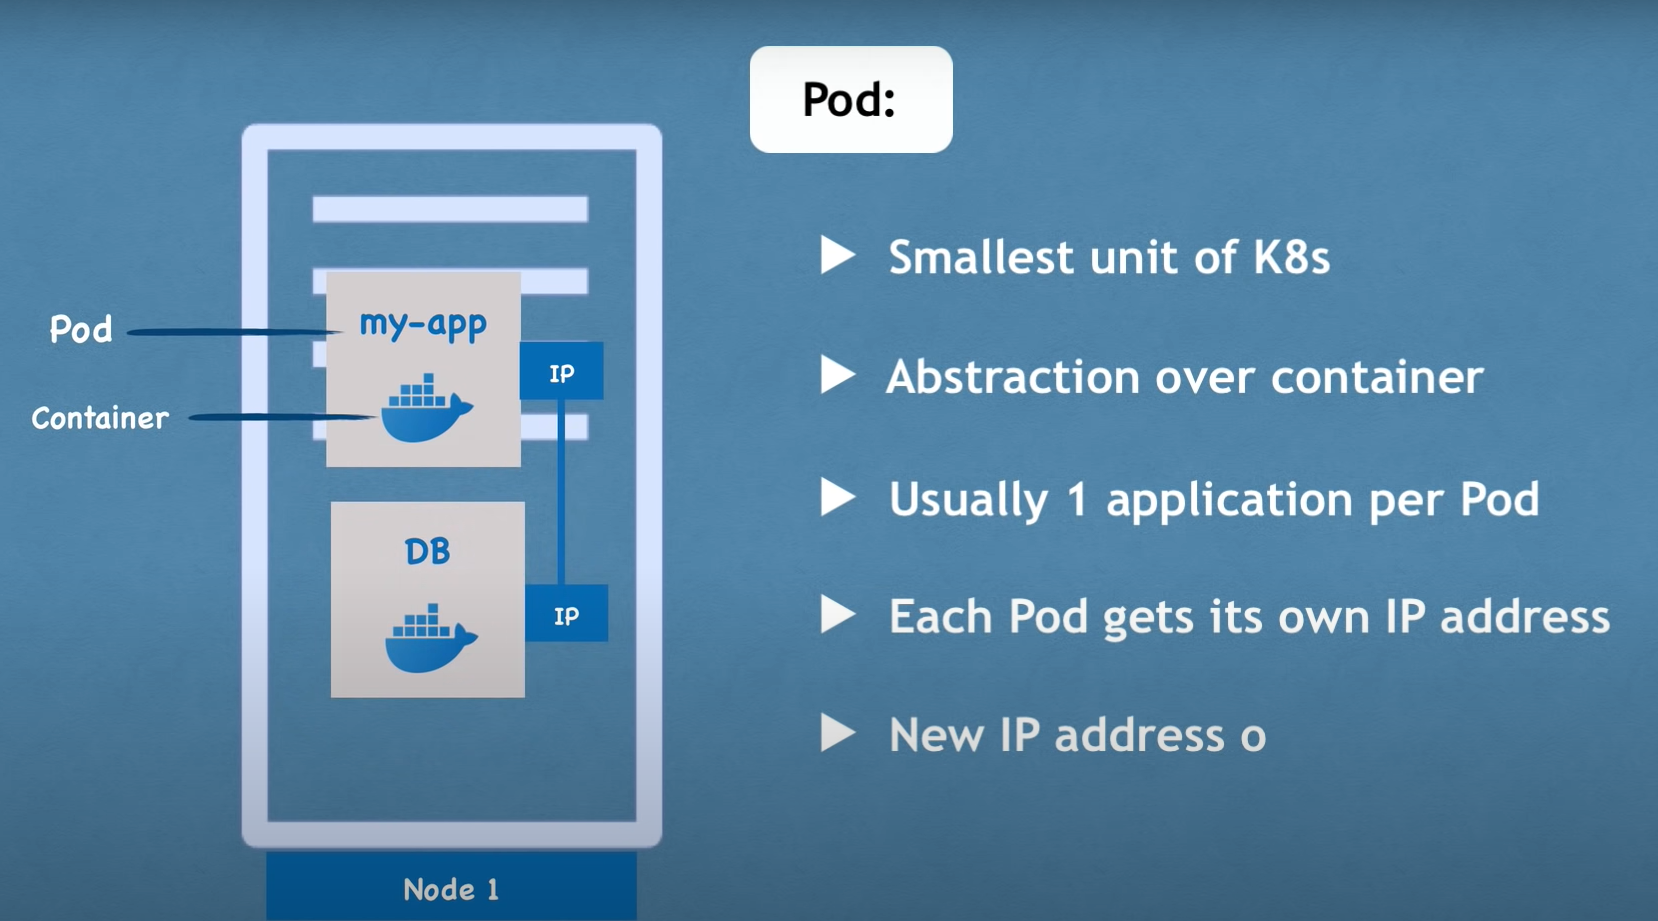

- **Service** : Its basically a permanent IP address.
            - Lifecycle of Pod and Service are NOT connected.
-For the Application to be accessed from the external devices we *EXTERNAL SERVICE*. 
- Whereas if we dont want the pod to be accessed from outside for example DB pod we use the *Internal Service*.
- With the help of service we can communicate using the IP address and port. (Ex: 10.2.23.38:80)
- But we need to communicate from the outside using the https://saikumar.com for that we need to use the ***Ingress***.
- When ever we hit the application the request first goes to the ingress then the forwarding is done.

**Note**: Service has 2 functionalities
        - It can have an Permanent IP
        - It can be used to route traffic to the Different Nodes in which the similar replica pods are running and act as a load balancer.

We dont create a replica Pods instead we enter these detail inside an YAML file and mention the minimum and max replicas needed any point of time which is known as ***Deployments***.
- Basically we create deployments whenever we want to spin up the pods say for MyApp.

**ConfigMap:** 

- Consider we have used the DB endpoint in our Application Code. Ex: mydb.sai
If i change it to mydb.saikumar I have to update my code and redeploy the entire application for that small change.
- For this type to this to be handled better we have ConfigMap in K8S.
where we declare external configuration of our entire App.
Ex: DB_URL = mongo-db
- Restrain keeping DB Name and Password inside a ConfigMap in plain text. For this to be handled K8S has a service called ***Secret.*** (used to store secret data, base64 encoding.
- Just like ConfigMap attach the secret to the Pod so that pod can use that Data.
- We can use the data of ConfigMap and secret inside of a App within a pod using Environment Variables or properties file. Ex: DB_URL



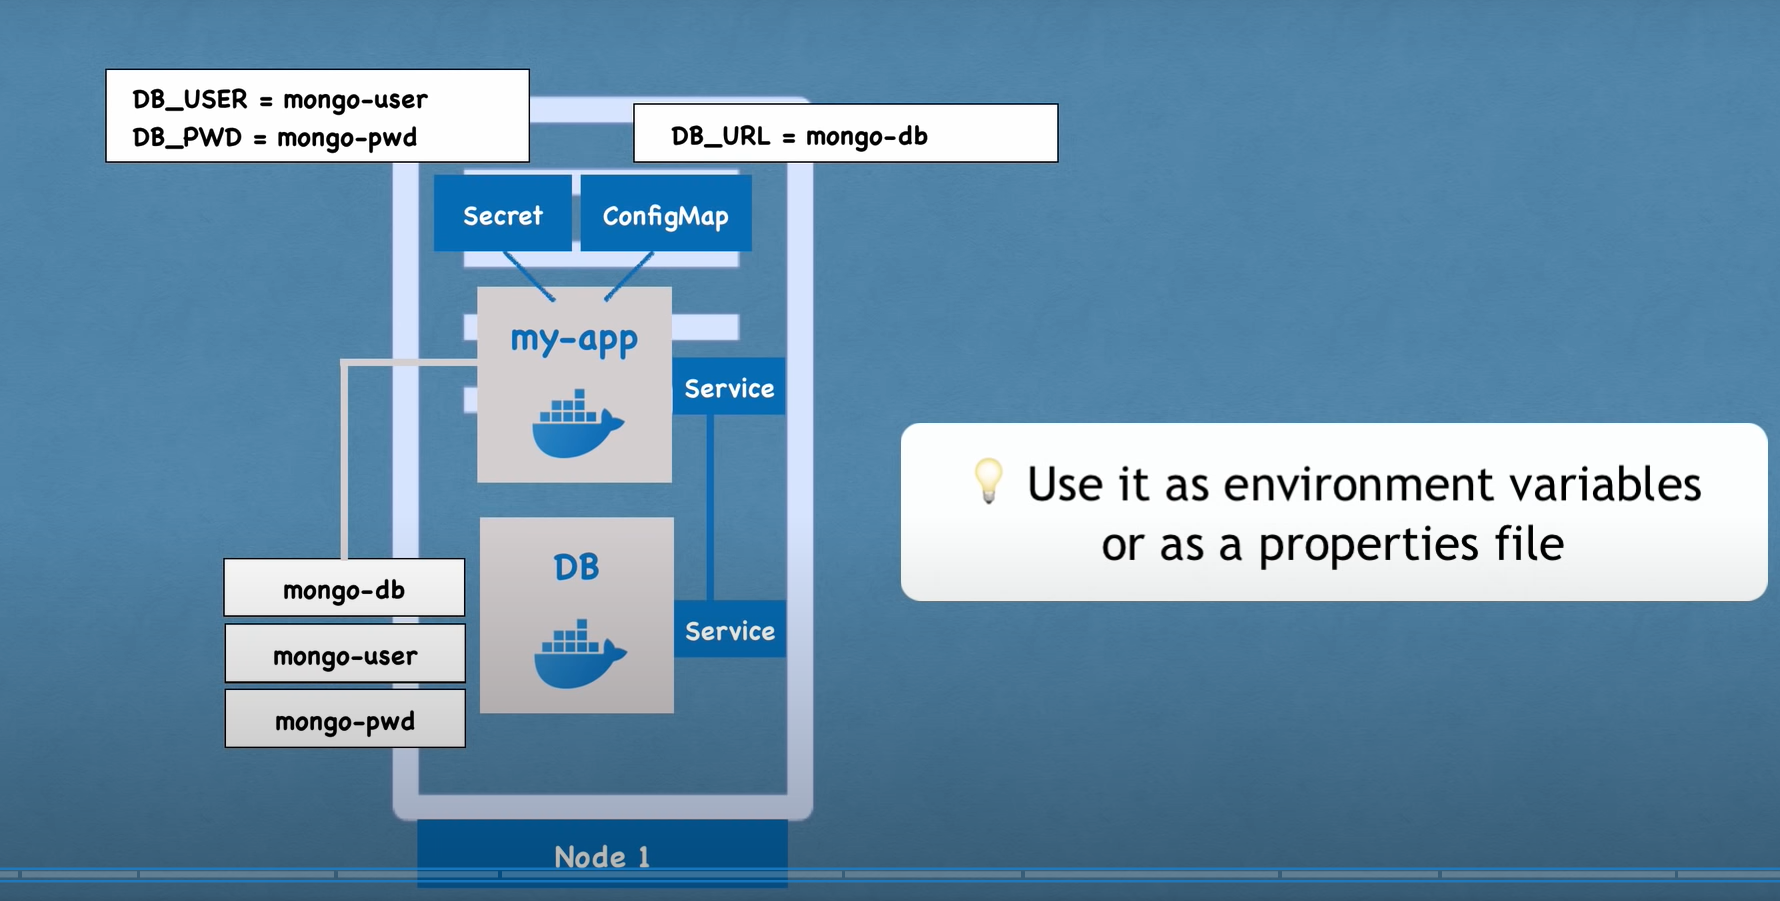

***Volumes***   (Persistent Volumes)

Suppose the DB gets restarted the Data might be lost. In order for the Data to be consistent with the Pod restart we use storage attached to the pod known as volume. It can be local or i.e on the same machine in which the pod is running or remote like a cloud storage.(which is not part of K8S cluster)


- We dont use Deployments to replicate  the number of pods related to the DB as at any given point of time we are not sure which pod is writing or fetching the data. This might cause inconsistencies in data. To avoid this we need which pod writes data to the volumes and which reads the data. This is achieved using a concept called ***SatefulSet***. (Mainly meant for DB)
- SatefulSet is used to created DB pods. This takes care of synchronization of data. Deploying using this statefulset is tedious and painful task.


**Note** - *Generally its best practice to keep the DB part out of the K8S.*






K8S Architecture:

Worker Nodes: 

- Each node has mutiple app pods that runs within.
- 3 process must be installed on every node. (Kubelet, Kube-Proxy & Contianer Runtime)
- Container Runtime must be installed on every node.
- The process that schedules the pods and containers underneath is ***Kubelet***. Which is a process of K8S that has interface with the cotainer runtime and the container created inside pod and assigning CPU resources from the Node to the containers.
- Each K8S Cluster consists of multiple nodes generally. the communication is generally enabled by the ***kube proxy*** among different nodes.


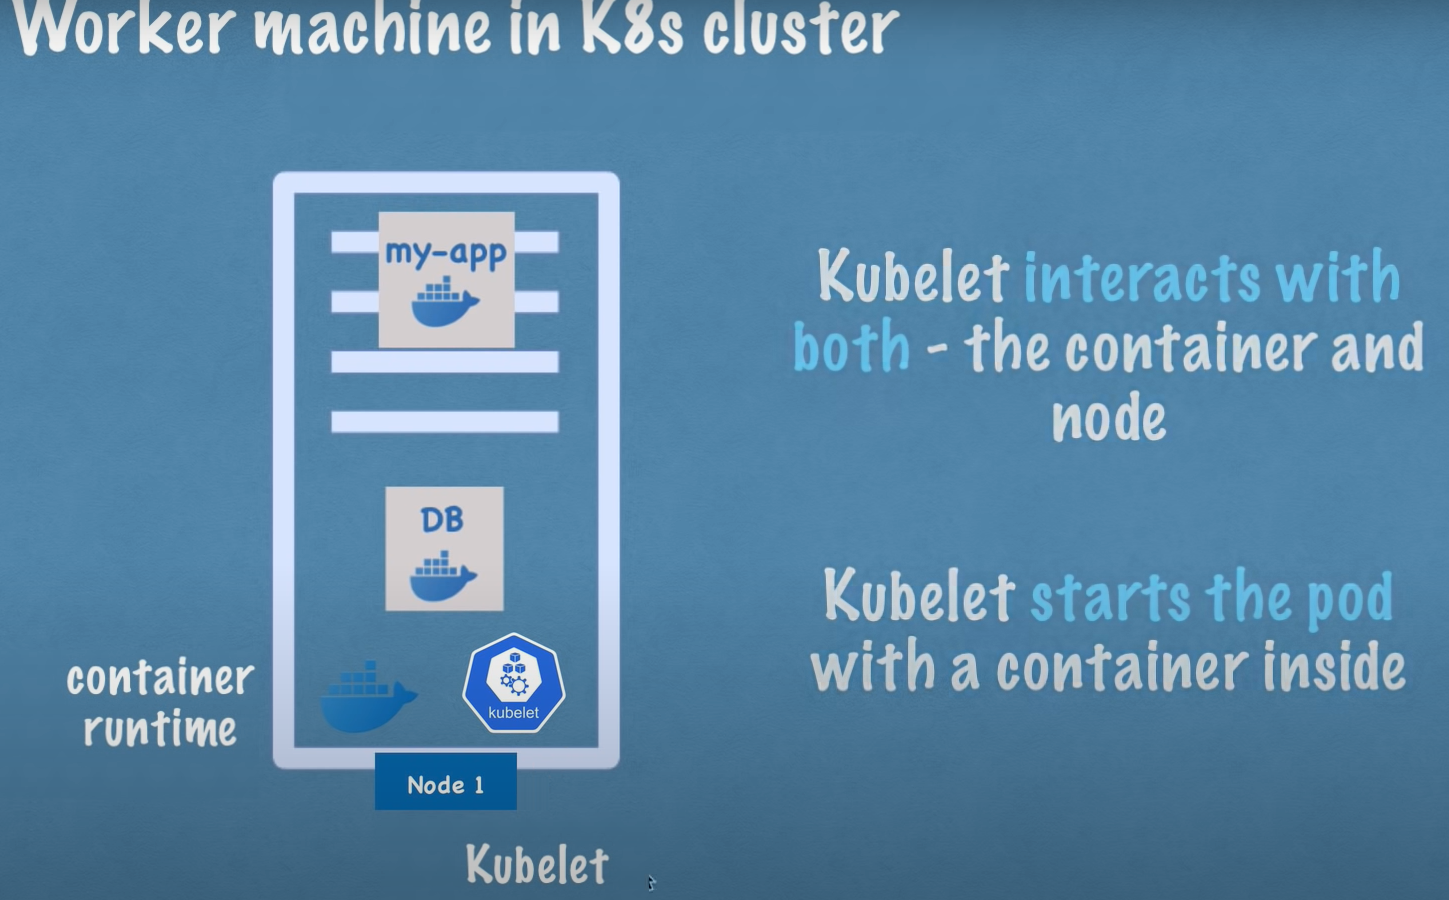

***How to Interact with the Cluster*** ? 

How to ?
- Schedule the Pod.
- Monitor
- re-schedule/re-start
- Join a new node.

All the above stuff is taken care by the **Master Node.**

Master Node Consists as follows:    

- **Api Server**: To enable the communication b/w cluster and the worker node. Also acts as a gatekeeper for Authentication to make sure only authenticated users get through the cluster.
  * Some Request -> API Server -> validates the request -> Other process -> Pod.
- **Scheduler**: After Validation API Server handles over to the scheduler. It has intelligent way of deciding which Worker to place the respective Pod(check the least busy node). The kubelet gets the request from the scheduler on a node decided by it and kubelet spins the respective pod.
- **Controller Mananger**: It detects the state changes in the pods like container dying and requests the scheduler to re-schedule the pods.
- **ETCD**: Its the cluster brain. Its  key-vlaue store. All the stuff that happens in K8S is stored in ETCD DB. It never stores the actula App data only data relating to nodes, CPU resources etc.,.. related to K8S services.
We might have multiple master nodes and the ETCD is spanned across mutiple master nodes.




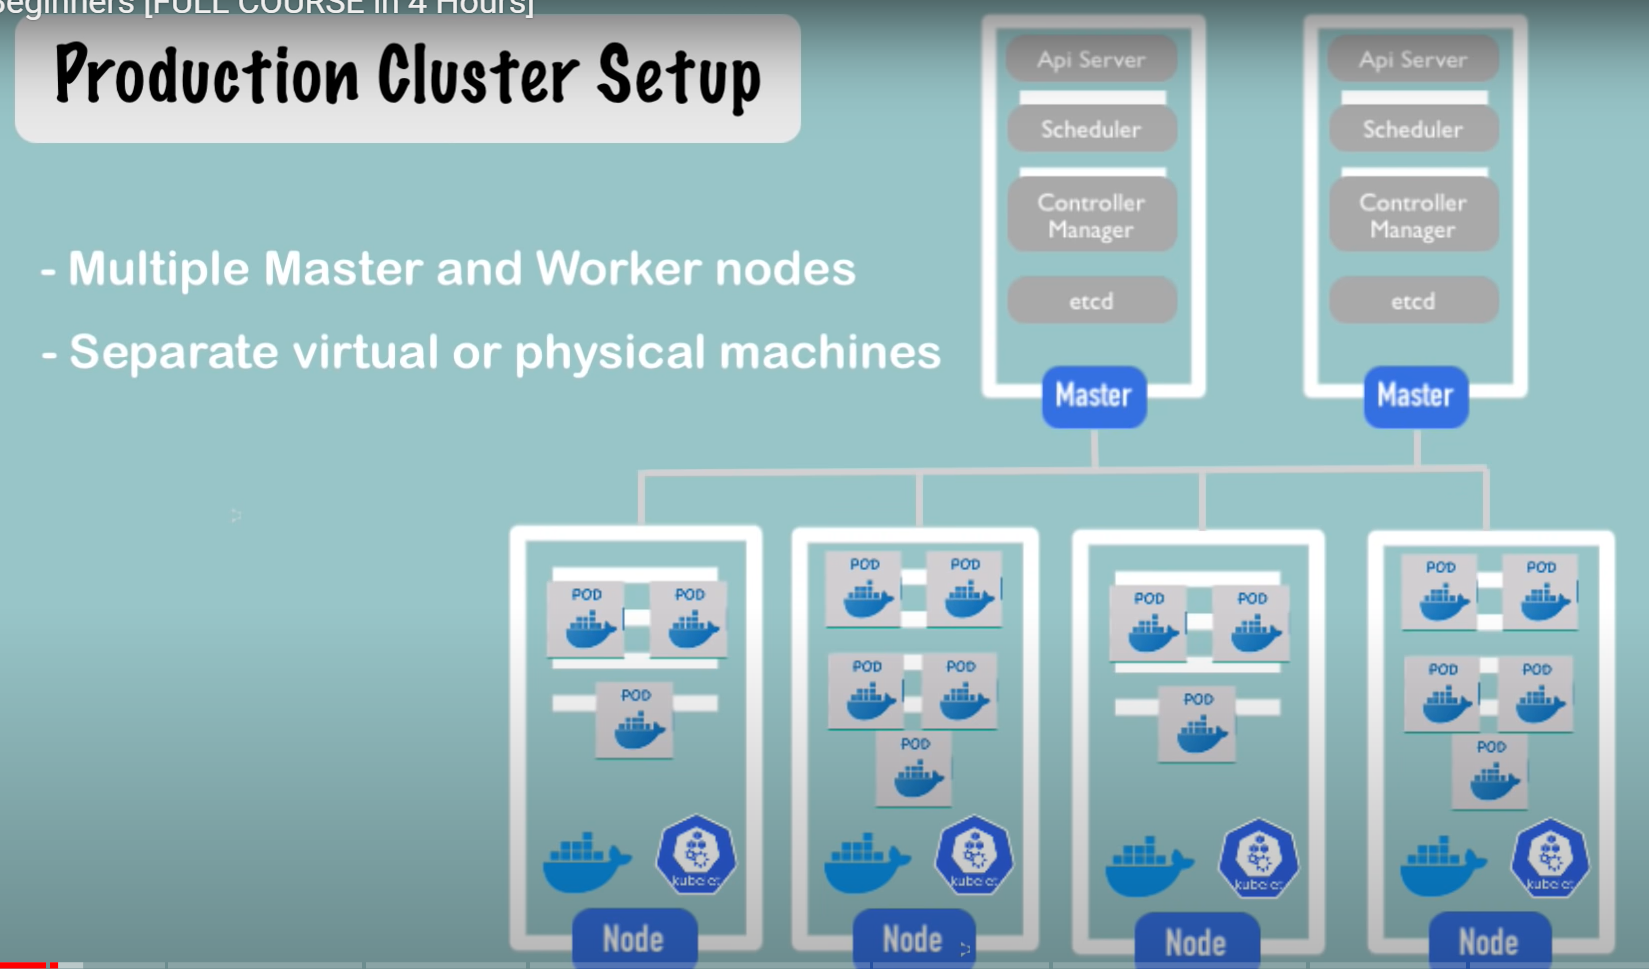

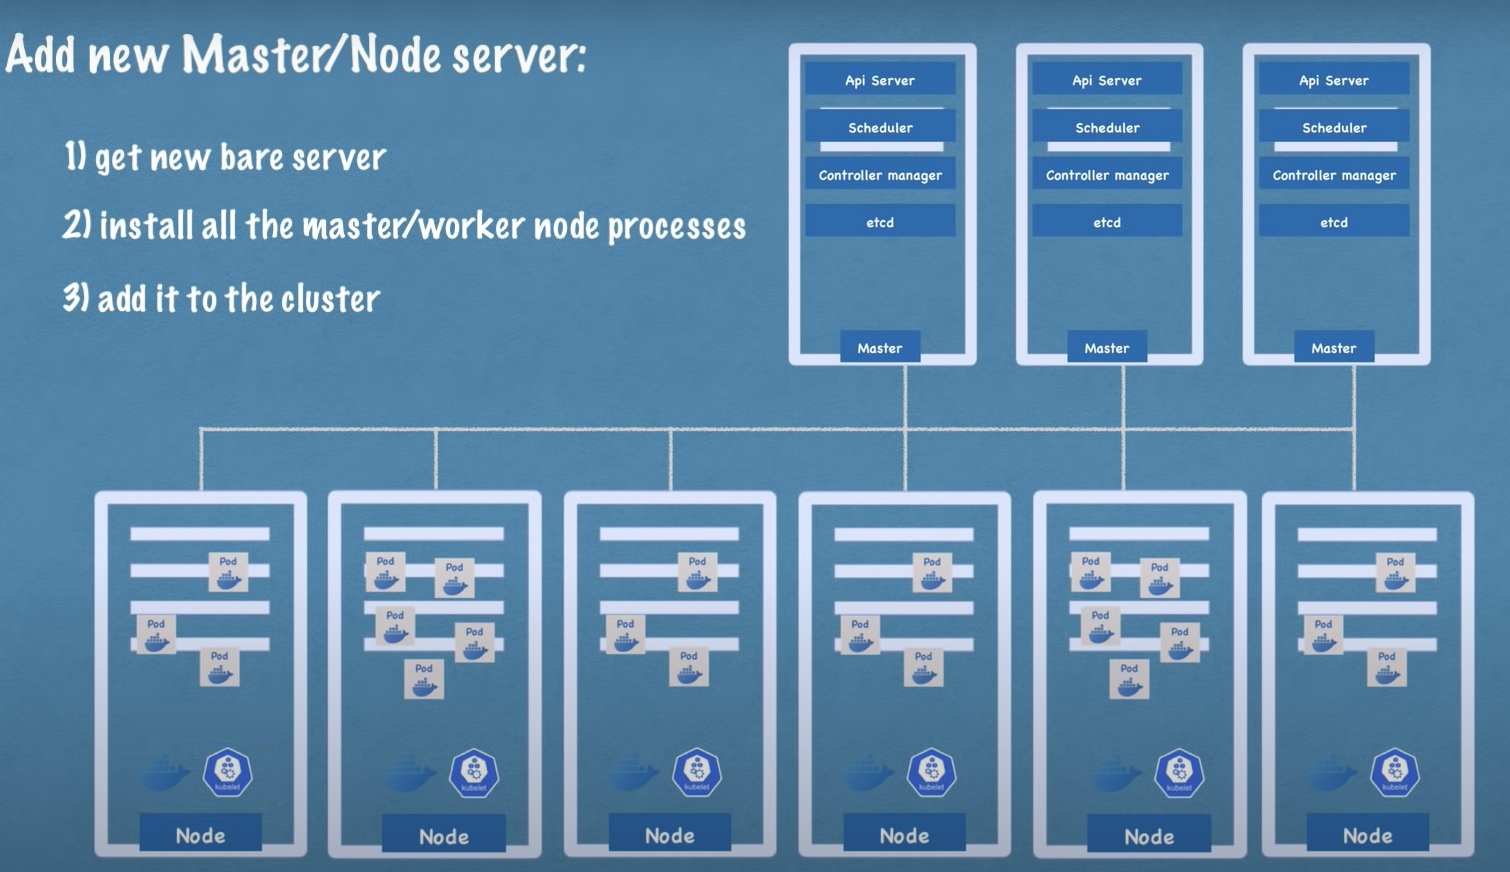